# Analyze WeRateDogs Tweets Dataset

## 1-Data Wrangling

### Gathering

1-The WeRateDogs Twitter archive.

In [2]:
import pandas as pd

arch_df = pd.read_csv('twitter-archive-enhanced.csv')
arch_df.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2-The tweet image predictions

In [317]:
pred_df= pd.read_csv('image-predictions.tsv',sep='\t')
pred_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3-collect tweet's retweet count and favorite ("like") count 

In [4]:
import tweepy
import json
from timeit import default_timer as timer
from tqdm import tqdm
consumer_key = '**********'
consumer_secret = '**********'
access_token = '**********'
access_secret = '**********'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

ids=arch_df.tweet_id
ids
fails_dict = {}
start = timer()
with open ('tweet_json.txt',mode='w') as outfile:
    for Id in tqdm(ids):
        try:
            tweet = api.get_status(id=Id,tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
#             print('failed')
            fails_dict[Id]= e

end=timer()
print(f'time to finish: {end-start}')
        
    


In [28]:
lst=[]
with open('tweet_json.txt',mode='r') as fh:
    for line in fh:
        obj=json.loads(line)
        Id=obj['id']
        retweet_count=obj['retweet_count']
        favorite_count=obj['favorite_count']
        lst.append({"tweet_id":Id,"retweet_count":retweet_count,"favorite_count":favorite_count })
    

In [32]:
df=pd.DataFrame(lst,columns=['tweet_id','retweet_count','favorite_count'])
df.to_csv('retweet_favorite.csv',index=False)

### ASSESS DATA

In [3]:
arch_df = pd.read_csv('twitter-archive-enhanced.csv')
arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#check for unique values in source
print(arch_df.source.unique(),'\n','_______________________________','\n')
#check for duplicated tweets
print(arch_df.duplicated("tweet_id").all(),'\n','_______________________________','\n')
#check for missing values and column data types
print(arch_df.info(),'\n','_______________________________','\n')
#check if we don't have retweets included
lt=arch_df.retweeted_status_id.unique()
print(len(arch_df[arch_df['tweet_id'].isin(lt)]))
#check for odd values
arch_df.describe()


[ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'] 
 _______________________________ 

False 
 _______________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null obje

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [5]:
pred_df= pd.read_csv('image-predictions.tsv',sep='\t')
pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#check for duplicated tweets
print(pred_df.duplicated('tweet_id').any(),'\n','_______________________________','\n')
#check for missing values and column data types
print(pred_df.info(),'\n','_______________________________','\n')
#check for duplicated entries that might be retweets
print(len(pred_df[pred_df.duplicated('jpg_url')]),'\n','_______________________________','\n')
#check for odd values
pred_df.describe()

False 
 _______________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None 
 _______________________________ 

66 
 _______________________________ 



,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [7]:
retweet_df=pd.read_csv('retweet_favorite.csv')
retweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7200,34579
1,892177421306343426,5406,29978
2,891815181378084864,3571,22546
3,891689557279858688,7423,37817
4,891327558926688256,7960,36119
5,891087950875897856,2677,18214
6,890971913173991426,1719,10610
7,890729181411237888,16202,58197
8,890609185150312448,3718,25079
9,890240255349198849,6258,28598


In [8]:
#check for missing values and column data types
print(retweet_df.info(),'\n','_______________________________','\n')
#check for odd values
retweet_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB
None 
 _______________________________ 



,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.418681e+17,2541.088096,7221.666523
std,6.823284e+16,4302.272563,11216.597384
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,512.000000,1254.500000
50%,7.182346e+17,1183.000000,3126.000000
75%,7.986692e+17,2940.500000,8817.500000
max,8.924206e+17,72837.000000,148308.000000


In [9]:
len(arch_df)
len(pred_df)
len(retweet_df)
len(set(arch_df.tweet_id).intersection(set(pred_df.tweet_id)).intersection(set(retweet_df.tweet_id)))


2057

#### Quality 
**arch_df**
* some column have too many missing values (in_reply_to_status_id, in_reply_to_user_id,retweeted_status_user_id,retweeted_status_timestamp)
* column source has html tags included "<a href=" ....
* some columns have almost the same value for all records(source)
* some of the values of extended url are the same url twise seperated by a ','
* extended url have missing values
* column timestamp is of type string
* columns (doggo, floofer, pupper, puppo) are of type string
* we have 112  retweets 
**pred_df**
* the table has 66 duplicated values for image url

#### Tidiness
* the dog stage is 4 columns instead of one
* our data is splitted to three tables



### Clean

#### Start with coping all of our tables in new dataframes not to mess the original data

In [124]:
# copy all tables in new dataframes
arch_df_clean=arch_df.copy()
pred_df_clean=pred_df.copy()
retweet_df_clean=retweet_df.copy()

#### Definition 1
There should not be any repeated tweets that's why we need to remove any tweet that is include both in tweet_id and in retweeted_status_id so we create a list of the uniuqe retweeted ids and remove the records that have the same id in tweet_id

#### Code 1

In [125]:
#remove retweets 
lt=arch_df.retweeted_status_id.unique()
arch_df_clean=arch_df_clean.query('tweet_id not in @lt')

#### Test1

In [126]:
#check if we stil have ids of retweeted tweets
print(len(arch_df_clean[arch_df['tweet_id'].isin(lt)]))

0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Definition 2
We should only keep the column that will be useful for our analyses so we drop all columns that are not very significant for our analysis('in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp','retweeted_status_id')

#### Code 2

In [127]:
#drop insignificant columns
arch_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id',
                    'retweeted_status_timestamp','retweeted_status_id'], axis=1,inplace=True)

#### Test 2

In [128]:
#Check if the table still have any of the dropped columns
arch_df_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPho...",This is Phineas. He's a mystical boy. Only ever appears in the hole of a don...,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPho...",This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not...,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPho...",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall gra...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


#### Definition 3
The 'source' variable should be a category instead of string so we start with extracting the right Category from the html object then we cast it to type category
#### Code 3

In [129]:
#extract category from html object in source column
arch_df_clean['source']= arch_df_clean.source.str.extract(r'>(.*)</a>',expand=True)
arch_df_clean['source']=arch_df_clean['source'].astype('category')

#### Test 3

In [130]:
#check if we have only the required category and the variable type is Categories
display(arch_df_clean['source'].unique())

[Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]
Categories (4, object): [Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]

#### Definition 4
The 'expanded_urls' variable should have one value only as the repeated values are just repeatition of each other so if ther is more than one value we split the string value on ',' and choose the second value if we have it or just use the original value if only one URL.

#### Code 4

In [131]:
pd.set_option('display.max_colwidth',80)
#fix the extended urls values and choose only one
for i in range(len(arch_df_clean.expanded_urls)):
    try:
        arch_df_clean.iloc[i,4]=arch_df_clean.iloc[i,4].split(',')[1]
    except:
        arch_df_clean.iloc[i,4]=arch_df_clean.iloc[i,4]


#### Test 4


In [132]:
#check that every Url has only one value which is the twitter URL. 
arch_df_clean.expanded_urls.head()

0    https://twitter.com/dog_rates/status/892420643555336193/photo/1
1    https://twitter.com/dog_rates/status/892177421306343426/photo/1
2    https://twitter.com/dog_rates/status/891815181378084864/photo/1
3    https://twitter.com/dog_rates/status/891689557279858688/photo/1
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1
Name: expanded_urls, dtype: object

#### Definition 5
The 'timestamp' variable should be of type datetime so we use pd.to_datetime to cast it to datetime value
#### Code 5

In [133]:
#fix the type of timestamp
arch_df_clean.timestamp=pd.to_datetime(arch_df_clean.timestamp)


#### Test 5

In [134]:
#check the new type of timestamp
arch_df_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

#### Definition 6
We should have one variable instead of four variables ('doggo','floofer','pupper','puppo') as it is one value of four only so we create a new variable and add the corresponding dog stage to it
#### Code 6

In [135]:
#replace the four columns with only one catecorical variable
arch_df_clean['stage']=None
arch_df_clean.loc[arch_df_clean.doggo=='doggo','stage']='doggo'
arch_df_clean.loc[arch_df_clean.floofer=='floofer','stage']='floofer'
arch_df_clean.loc[arch_df_clean.pupper=='pupper','stage']='pupper'
arch_df_clean.loc[arch_df_clean.puppo=='puppo','stage']='puppo'
arch_df_clean=arch_df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test 6

In [136]:
#check if we have one column stage instead of four
arch_df_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a don...,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not...,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall gra...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None


#### Definition 7
We should have each observation unit as one table so we merge all of our table into one called master 
#### Code 7

In [137]:
#merge all Tables
master=arch_df_clean.merge(pred_df_clean,on='tweet_id').merge(retweet_df_clean,on='tweet_id')

#### Test 7

In [138]:
# Check the new full table
master .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1958
Data columns (total 22 columns):
tweet_id              1959 non-null int64
timestamp             1959 non-null datetime64[ns]
source                1959 non-null category
text                  1959 non-null object
expanded_urls         1959 non-null object
rating_numerator      1959 non-null int64
rating_denominator    1959 non-null int64
name                  1959 non-null object
stage                 295 non-null object
jpg_url               1959 non-null object
img_num               1959 non-null int64
p1                    1959 non-null object
p1_conf               1959 non-null float64
p1_dog                1959 non-null bool
p2                    1959 non-null object
p2_conf               1959 non-null float64
p2_dog                1959 non-null bool
p3                    1959 non-null object
p3_conf               1959 non-null float64
p3_dog                1959 non-null bool
retweet_count         1959 non-

# 2- Storing

In [139]:
#save dataframe as csv
master.to_csv('twitter_archive_master.csv',index=False)

# 3- Analyzing, and Visualizing

In [370]:
#load clean data
import matplotlib as plt
import pandas as pd
% matplotlib inline
df=pd.read_csv('twitter_archive_master.csv')
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7200,34579
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5406,29978
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/890971913173991426/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3571,22546
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7423,37817
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/890971913173991426/photo/1,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7960,36119
5,891087950875897856,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2677,18214
6,890971913173991426,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1719,10610
7,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16202,58197
8,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.48757

## Create a new column for rating 

In [413]:
df['rating']=df['rating_numerator']/df['rating_denominator']
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,7200,34579,1.3
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,5406,29978,1.3
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/890971913173991426/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,3571,22546,1.2
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7423,37817,1.3
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/890971913173991426/photo/1,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7960,36119,1.2
5,891087950875897856,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2677,18214,1.3
6,890971913173991426,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1719,10610,1.3
7,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16202,58197,1.3
8,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_r

## what is porpotion for each dog stage in the data set?

pupper     206
doggo       61
puppo       20
floofer      8
Name: stage, dtype: int64

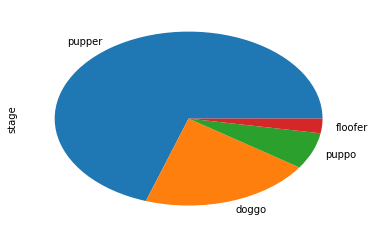

In [430]:
df.stage.value_counts().plot(kind='pie');
df.stage.value_counts()


### so most of our dogs are pupper :D

## what is porpotion for each dog breed in the data set?

In [437]:
df[df['p1_dog']==True].p1.value_counts()


golden_retriever               139
Labrador_retriever              92
Pembroke                        85
Chihuahua                       78
pug                             55
chow                            42
Samoyed                         40
toy_poodle                      37
Pomeranian                      36
malamute                        29
cocker_spaniel                  27
miniature_pinscher              23
Chesapeake_Bay_retriever        22
French_bulldog                  21
Siberian_husky                  20
German_shepherd                 20
Shetland_sheepdog               18
Staffordshire_bullterrier       18
Maltese_dog                     18
Rottweiler                      17
beagle                          17
Shih-Tzu                        16
Lakeland_terrier                16
Italian_greyhound               16
Cardigan                        16
kuvasz                          15
Eskimo_dog                      15
Great_Pyrenees                  14
Pekinese            

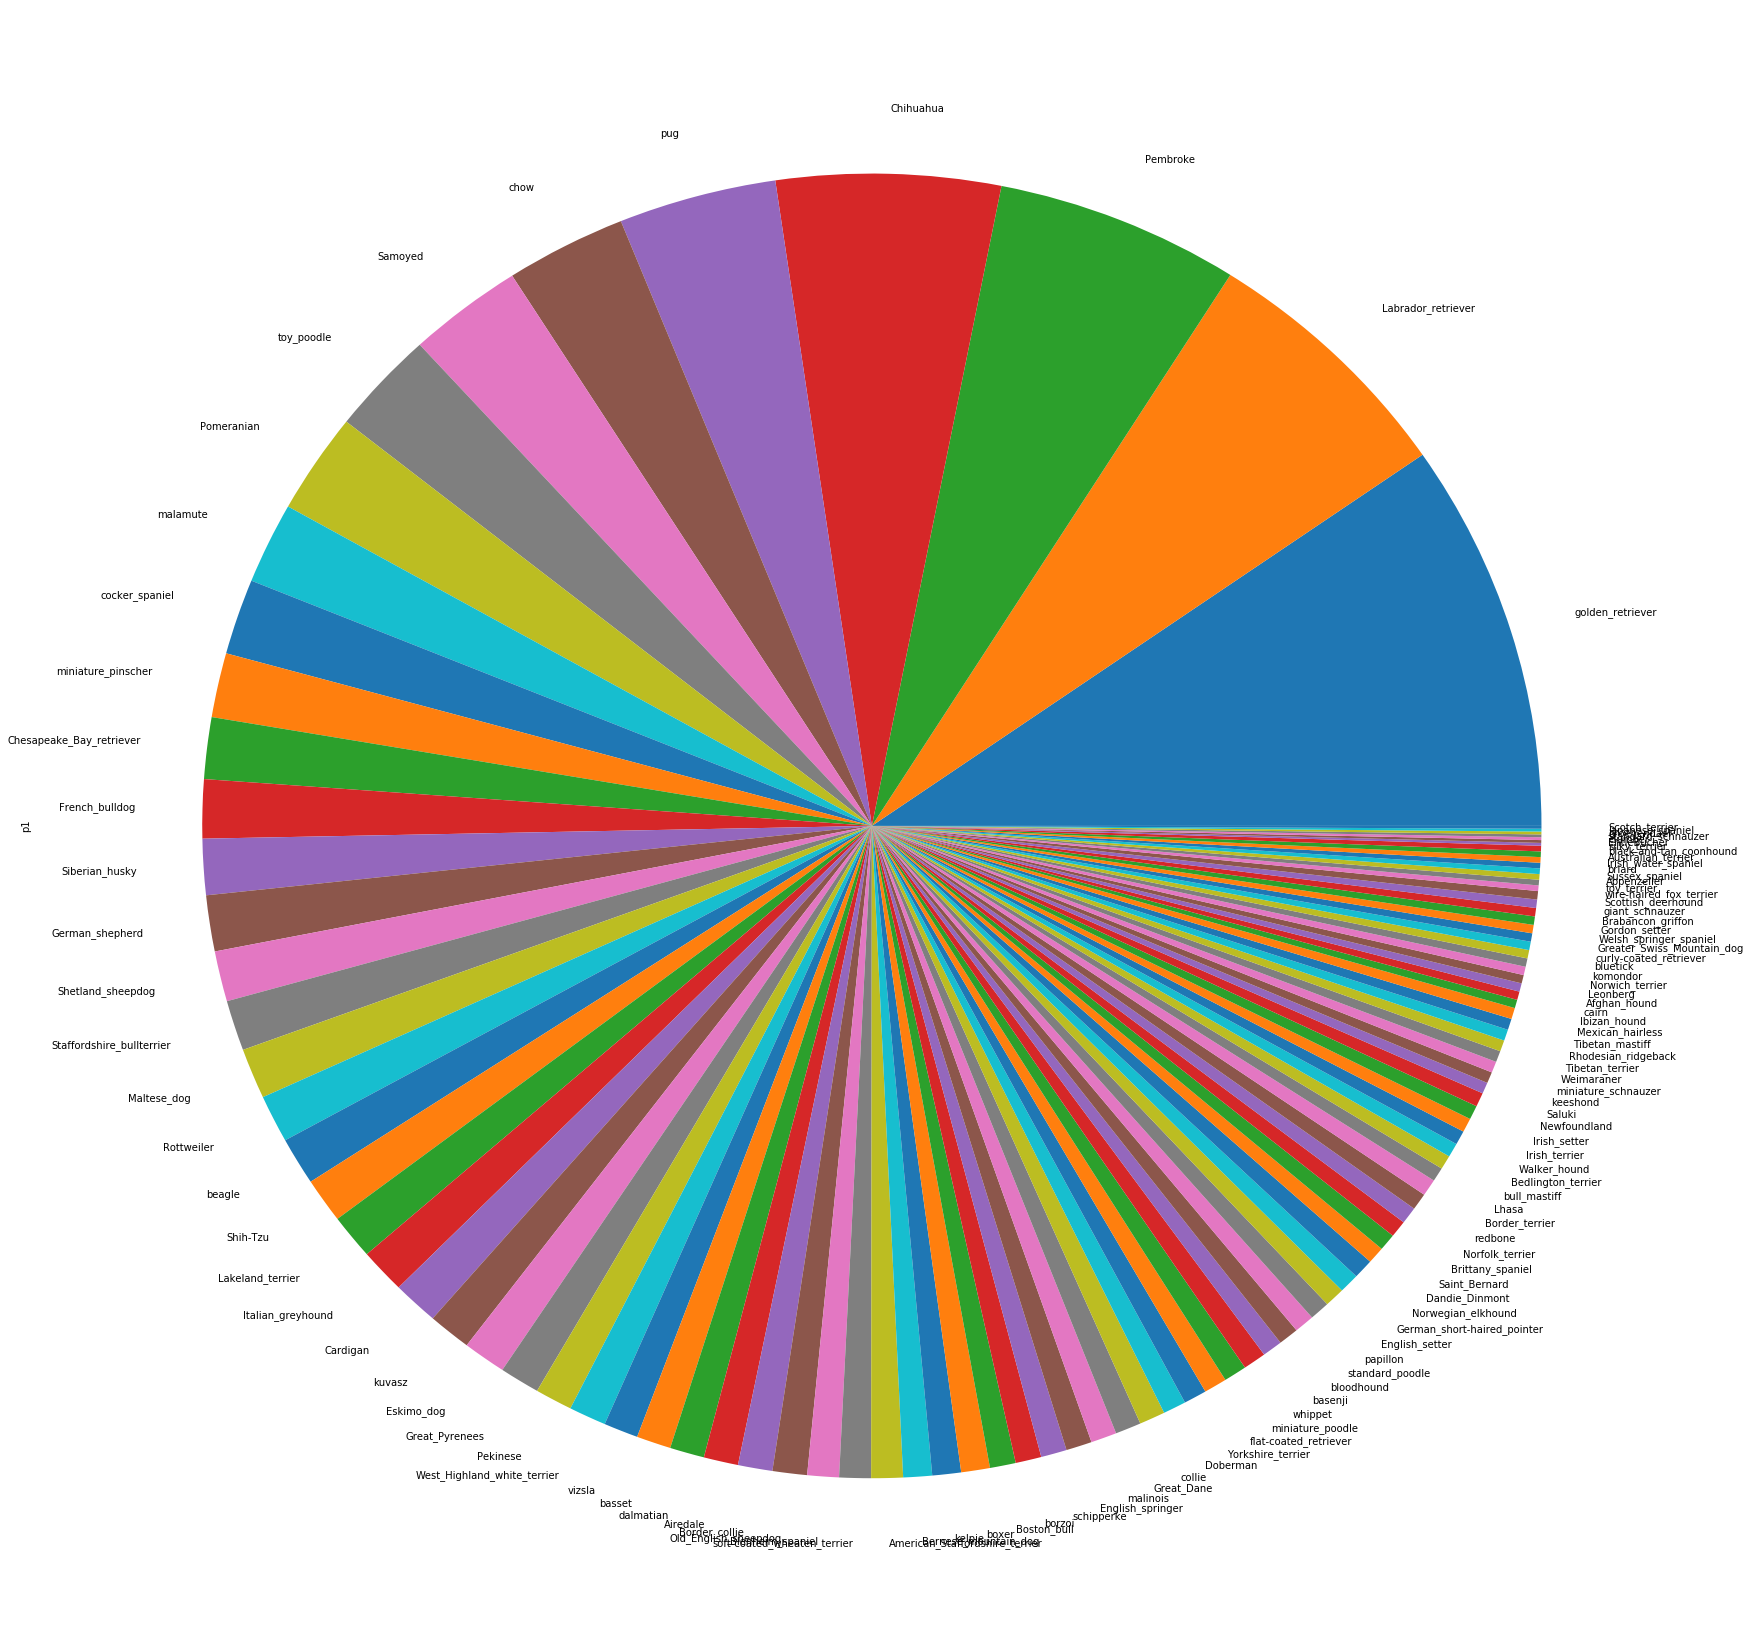

In [438]:
df[df['p1_dog']==True].p1.value_counts().plot(kind='pie',figsize=(30, 30));


### so golden_retriever is the most frequent breed

## what is the average rating overall and for every stage and dog breed?

In [415]:
#over all average rating
print('overall average rating: ',df['rating'].mean())

overall average rating:  1.16747479167


average rating per stage:  stage
doggo      1.198361
floofer    1.187500
pupper     1.075728
puppo      1.195000
Name: rating, dtype: float64


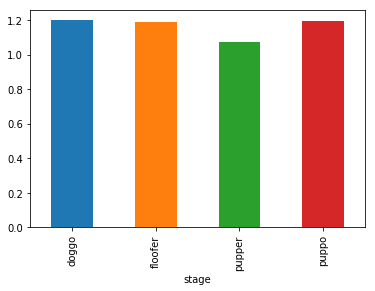

In [420]:
#average rating per stage
print('average rating per stage: ',df.groupby('stage')['rating'].mean())
df.groupby('stage')['rating'].mean().plot(kind='bar');

### so doggo relatively gets slightly better ratings.

In [424]:
#average rating per dog pred
df[df['p1_dog']==True].groupby('p1')['rating'].mean().sort_values(ascending=False)

p1
clumber                        2.700000
Saluki                         1.250000
briard                         1.250000
Tibetan_mastiff                1.225000
Irish_setter                   1.220000
Border_terrier                 1.216667
kuvasz                         1.213333
standard_schnauzer             1.200000
silky_terrier                  1.200000
giant_schnauzer                1.200000
Samoyed                        1.177500
golden_retriever               1.172998
chow                           1.164286
Eskimo_dog                     1.153333
Cardigan                       1.150000
kelpie                         1.150000
wire-haired_fox_terrier        1.150000
Great_Pyrenees                 1.150000
Australian_terrier             1.150000
Pembroke                       1.143529
bluetick                       1.133333
Norfolk_terrier                1.133333
Greater_Swiss_Mountain_dog     1.133333
Leonberg                       1.133333
cocker_spaniel                 1.1296

### so clumber relatively gets a better ratings.

## Is the dog stage related to the number of retweets and favourite count?


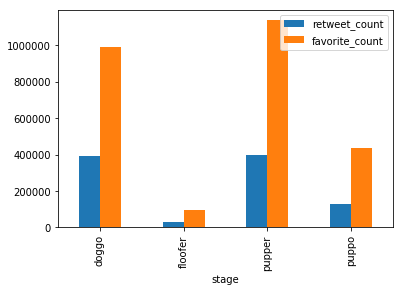

In [435]:
df.groupby('stage')['retweet_count','favorite_count'].sum().plot(kind='bar');

### so doggo and pupper are the most retweeted and pupper tweets are the most favoured

## Is the dog breed related to the number of retweets and likes?


In [407]:
df[df['p1_dog']==True].groupby('p1')['retweet_count','favorite_count'].mean().sort_values(by=['favorite_count','retweet_count'], ascending=False)
                                                                                         
                                                                                         

,retweet_count,favorite_count
p1,,
Saluki,4251.750000,21284.750000
French_bulldog,3685.000000,15168.619048
black-and-tan_coonhound,3414.500000,14989.000000
flat-coated_retriever,3817.250000,14858.625000
Eskimo_dog,4895.000000,13249.000000
English_springer,5002.777778,13074.333333
Leonberg,3172.333333,12954.000000
basset,2823.166667,12634.166667
Irish_water_spaniel,2814.000000,11977.500000


### so Saluki twets appear to be the most relatively liked and interacted with